In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
BostonData = pd.read_csv('../Data/Boston.csv')
del BostonData['Unnamed: 0']
BostonData.dropna(inplace = True)
print(BostonData.head())
print(len(BostonData))
%matplotlib inline

      crim  zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
506


/Users/albarron/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
X = BostonData[BostonData.columns.values]
del X['medv']
y = BostonData.medv

In [3]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

In [4]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor()
treereg.fit(X_train,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=None,
           splitter='best')

In [5]:
preds = treereg.predict(X_test)
from sklearn import metrics
import numpy as np
np.sqrt(metrics.mean_squared_error(y_test, preds)) # Give MSE the same units

4.3131094799259113

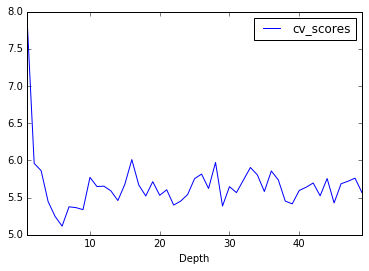

In [6]:
from sklearn.cross_validation import cross_val_score
Depth = range(1,50)
score = []
for i in Depth: # How many decision points are in the tree
      treereg = DecisionTreeRegressor(max_depth=i)
      scores = cross_val_score(treereg, X, y, cv=10, scoring='mean_squared_error')
      score.append(np.mean(np.sqrt(-scores)))

Depth_Choice_df = pd.DataFrame({'cv_scores': score ,'Depth': Depth})
Depth_Choice_df.plot(x ='Depth',y = 'cv_scores' )

# we can see most of the imporvement is being captured by max_depth = 4. After that point 
# imporvement rate is less.  We can set max_depth to 4 or 6

Note that we did a -scores in the previous statement. This is because scikit reports mean square error as negative. Some debate/discussions on why the score is negative: https://github.com/scikit-learn/scikit-learn/issues/2439

In [7]:
treereg = DecisionTreeRegressor(max_depth=4)
treereg.fit(X,y)
ImportanceDataFrame = pd.DataFrame({'feature':X.columns.values, 'importance':treereg.feature_importances_})
ImportanceDataFrame.sort_values(by = ['importance'],ascending = 0)

# it sounds like rm, lstat, dis, crim, nox and ptratio have 

,feature,importance
5,rm,0.645507
12,lstat,0.193254
7,dis,0.075002
4,nox,0.041732
0,crim,0.040373
10,ptratio,0.004132
1,zn,0.000000
2,indus,0.000000
3,chas,0.000000
6,age,0.000000


### Installing Graphviz (optional):
* Mac:
    * option: Type "conda install graphviz"in your command line
* Windows:
     [Download and install MSI file](http://www.graphviz.org/Download_windows.php)
     * Add it to your Path: Go to Control Panel, System, Advanced System Settings, Environment Variables. Under system 
       variables,edit "Path" to include the path to the "bin" folder, such as: C:\Program Files (x86)\Graphviz2.38\bin

In [8]:
"""
# This is how we can create a graphical summary of decision trees. We can creat .dot files and 
# then need to either use a software that can open dot files or change dot file to png files
# in command line and then open it. 
# create a Graphviz file
from sklearn.tree import export_graphviz
with open("dt1.dot", 'wb') as f:
    f = export_graphviz(treereg, out_file=f, feature_names=X.columns.values)
"""

'\n# This is how we can create a graphical summary of decision trees. We can creat .dot files and \n# then need to either use a software that can open dot files or change dot file to png files\n# in command line and then open it. \n# create a Graphviz file\nfrom sklearn.tree import export_graphviz\nwith open("dt1.dot", \'wb\') as f:\n    f = export_graphviz(treereg, out_file=f, feature_names=X.columns.values)\n'

# Decision-Trees - Classification

In [9]:

BostonData['medvCategory'] = '1'
mask_cat2 = ((BostonData['medv'] > BostonData['medv'].quantile(.2)) & 
            (BostonData['medv'] <= BostonData['medv'].quantile(.5)))   
mask_cat3 = ((BostonData['medv'] > BostonData['medv'].quantile(.5)) & 
            (BostonData['medv'] <= BostonData['medv'].quantile(.8)))  
mask_cat4 = (BostonData['medv'] > BostonData['medv'].quantile(.8)) 

BostonData.loc[mask_cat2,'medvCategory'] = '2'
BostonData.loc[mask_cat3,'medvCategory'] = '3'
BostonData.loc[mask_cat4,'medvCategory'] = '4'

In [10]:
del BostonData['medv']
X = BostonData[BostonData.columns.values]
del X['medvCategory']
y = BostonData.medvCategory

In [11]:
from sklearn.tree import DecisionTreeClassifier
TreeClass = DecisionTreeClassifier(
                max_depth = 2,
                min_samples_leaf = 5)
TreeClass.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

In [12]:
scores = cross_val_score(TreeClass, X, y, cv=10)
print(scores.mean()) # Score = More is better, error is 1-score

0.558498630802


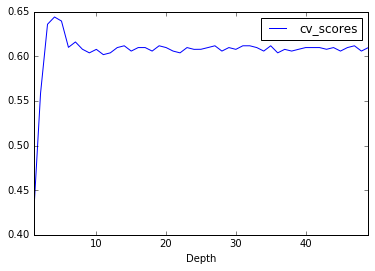

In [13]:
Depth = range(1,50)
score = []
for i in Depth:
      TreeClass = DecisionTreeClassifier(
                max_depth = i,
                min_samples_leaf = 5)
      scores = cross_val_score(TreeClass, X, y, cv=10)
      score.append(np.mean(scores))

Depth_Choice_df = pd.DataFrame({'cv_scores': score ,'Depth': Depth})
Depth_Choice_df.plot(x ='Depth',y = 'cv_scores' )

#It seems like at depth = 4 we achieved the best result

In [14]:
TreeClass = DecisionTreeClassifier(
                max_depth = 4,
                min_samples_leaf = 5)
TreeClass.fit(X,y)
ImportanceDataFrame = pd.DataFrame({'feature':X.columns.values, 'importance':TreeClass.feature_importances_})
ImportanceDataFrame.sort_values(by = ['importance'],ascending = 0)

,feature,importance
12,lstat,0.441247
5,rm,0.366479
0,crim,0.130794
10,ptratio,0.043741
7,dis,0.017739
1,zn,0.000000
2,indus,0.000000
3,chas,0.000000
4,nox,0.000000
6,age,0.000000


In [15]:
"""
from sklearn.tree import export_graphviz
from os import system 
model = DecisionTreeClassifier()
model.fit(X, y) 
def build_tree_image(model):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model,
                    out_file = dotfile,
                    feature_names = X.columns.values)
    dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")

   
build_tree_image(model1)
"""

NameError: name 'model1' is not defined